In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import statsmodels.tsa.api as smt

from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error  #MSE
from statsmodels.tsa.stattools import adfuller

In [7]:
# Load the dataset
file_path = '/content/Daily_Gold_Price.csv'
data = pd.read_csv(file_path)

# Display the first 10 records
print(data.head(10))

         Date  Indian rupee (INR) per gram
0  01-01-1979                     0.000000
1  02-01-1979                    57.641466
2  03-01-1979                    57.940468
3  04-01-1979                    58.248794
4  05-01-1979                    59.272152
5  08-01-1979                    59.200134
6  09-01-1979                    58.595379
7  10-01-1979                    57.983871
8  11-01-1979                    58.339780
9  12-01-1979                    57.312564


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11290 entries, 0 to 11289
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         11290 non-null  object 
 1   Indian rupee (INR) per gram  11290 non-null  float64
dtypes: float64(1), object(1)
memory usage: 176.5+ KB


In [9]:
data.describe()

,Indian rupee (INR) per gram
count,11290.000000
mean,1115.512200
std,1222.164962
min,0.000000
25%,202.073390
50%,427.502690
75%,2203.947101
max,5041.741507


In [10]:
# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Display the first 10 records
print(data.head(10))

        Date  Indian rupee (INR) per gram
0 1979-01-01                     0.000000
1 1979-01-02                    57.641466
2 1979-01-03                    57.940468
3 1979-01-04                    58.248794
4 1979-01-05                    59.272152
5 1979-01-08                    59.200134
6 1979-01-09                    58.595379
7 1979-01-10                    57.983871
8 1979-01-11                    58.339780
9 1979-01-12                    57.312564


In [11]:
# Split the data into training and test sets
train = data.iloc[:-365]
test = data.iloc[-365:]
train_decompose = train[1:]
data_ARIMA = data
train_ARIMA = train
test_ARIMA = test

Single Exponential Smoothing MSE: 68574.26611219879
Double Exponential Smoothing MSE: 186346.48026924624
Triple Exponential Smoothing MSE: 555249.5765938044


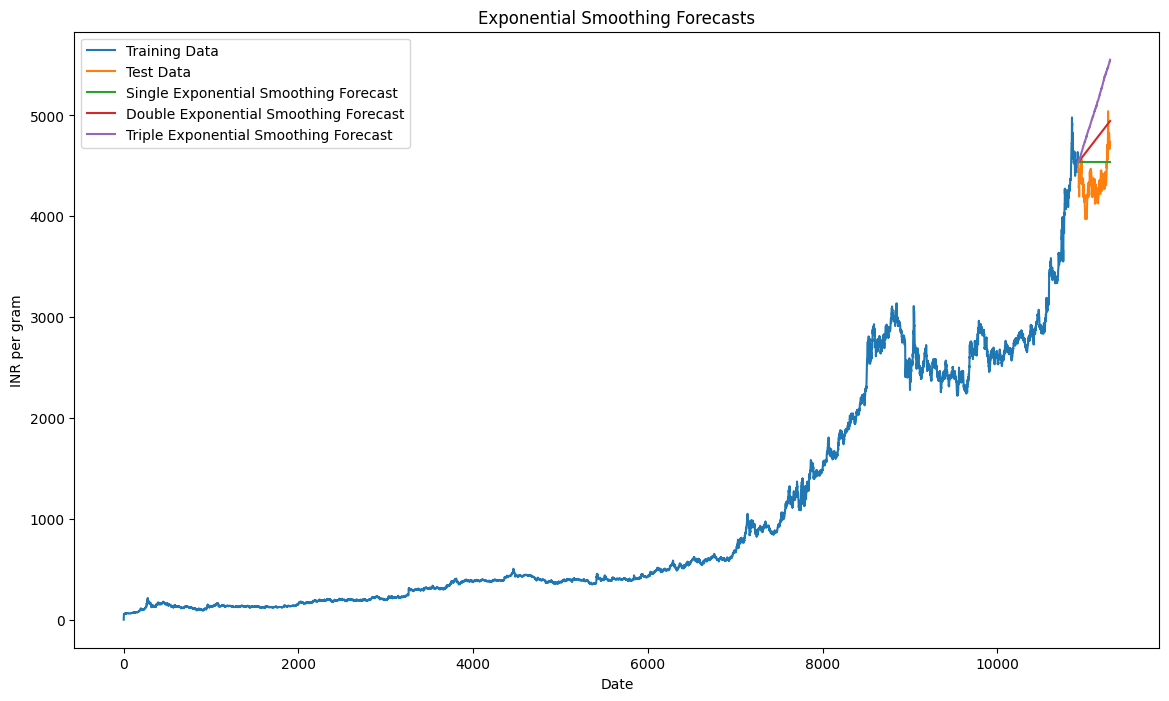

In [12]:
# Exponential Smoothening

# Single Exponential Smoothing
model_single = SimpleExpSmoothing(train['Indian rupee (INR) per gram']).fit()
forecast_single = model_single.forecast(365)

# Double Exponential Smoothing (Holt's linear trend)
model_double = ExponentialSmoothing(train['Indian rupee (INR) per gram'], trend='add').fit()
forecast_double = model_double.forecast(365)

# Triple Exponential Smoothing (Holt-Winters seasonal)
# Assuming yearly seasonality (period=365), adjust as needed for your data
model_triple = ExponentialSmoothing(train['Indian rupee (INR) per gram'], trend='add', seasonal='add', seasonal_periods=365).fit()
forecast_triple = model_triple.forecast(365)

# Calculate and print the Mean Squared Error for each model
mse_single = mean_squared_error(test['Indian rupee (INR) per gram'], forecast_single)
mse_double = mean_squared_error(test['Indian rupee (INR) per gram'], forecast_double)
mse_triple = mean_squared_error(test['Indian rupee (INR) per gram'], forecast_triple)

print(f"Single Exponential Smoothing MSE: {mse_single}")
print(f"Double Exponential Smoothing MSE: {mse_double}")
print(f"Triple Exponential Smoothing MSE: {mse_triple}")

# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(train['Indian rupee (INR) per gram'], label='Training Data')
plt.plot(test['Indian rupee (INR) per gram'], label='Test Data')
plt.plot(test.index, forecast_single, label='Single Exponential Smoothing Forecast')
plt.plot(test.index, forecast_double, label='Double Exponential Smoothing Forecast')
plt.plot(test.index, forecast_triple, label='Triple Exponential Smoothing Forecast')
plt.title('Exponential Smoothing Forecasts')
plt.xlabel('Date')
plt.ylabel('INR per gram')
plt.legend()
plt.show()

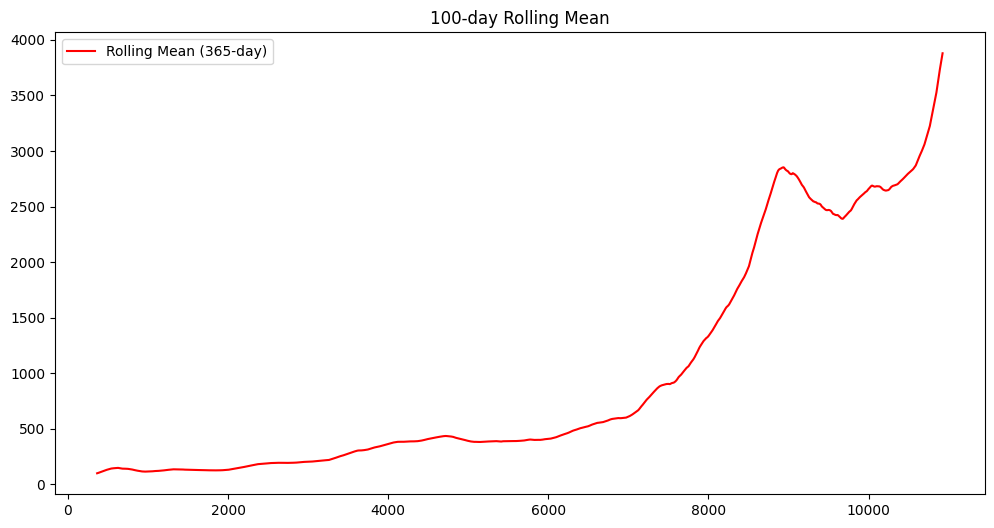

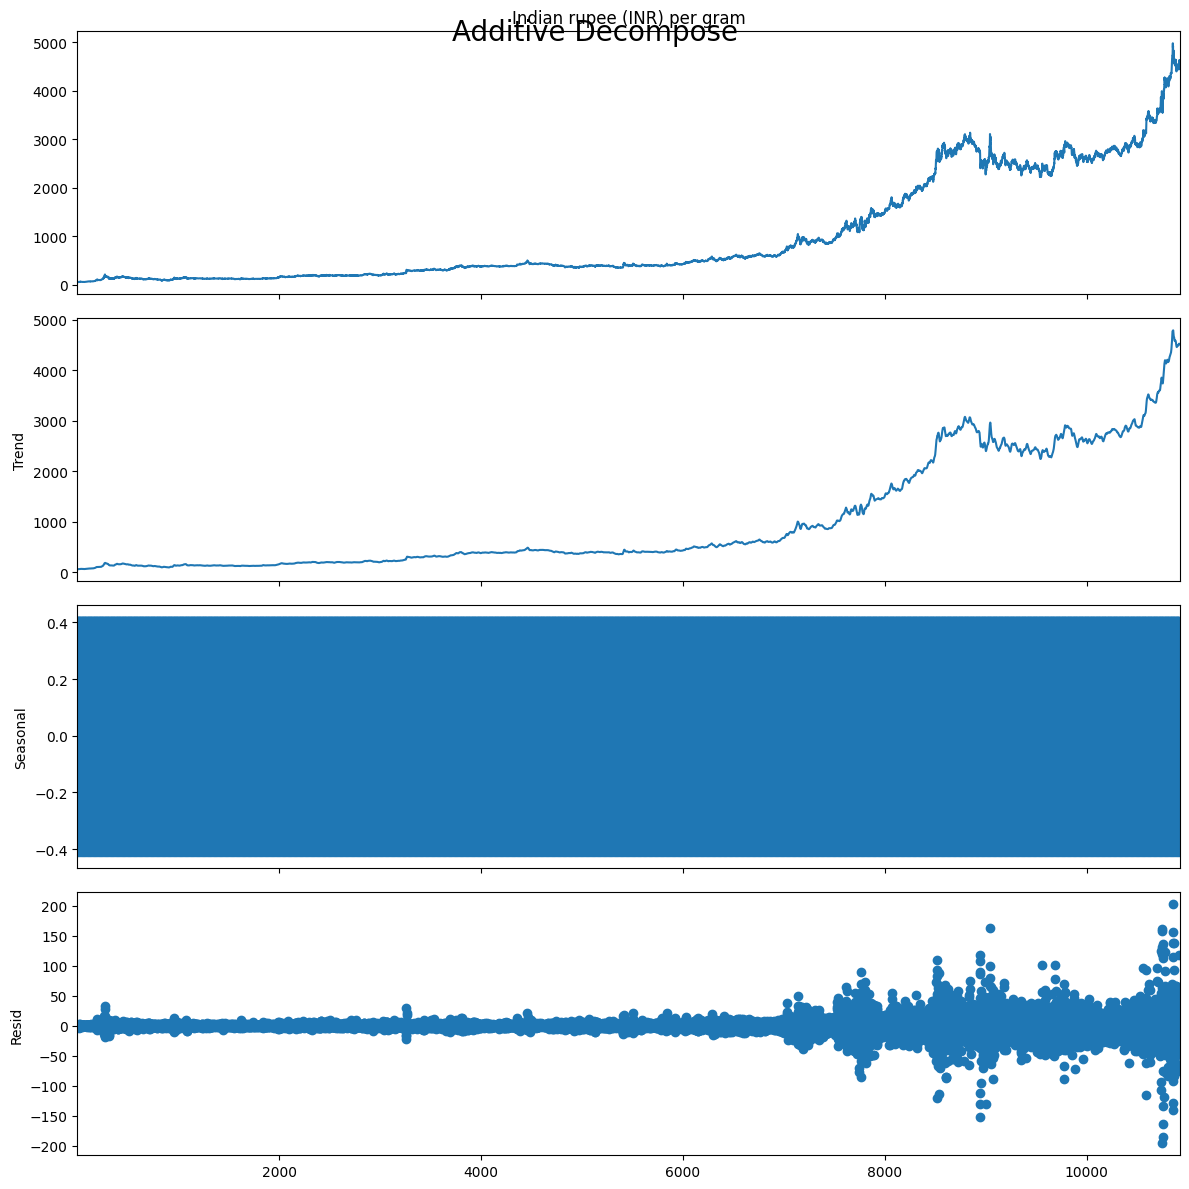

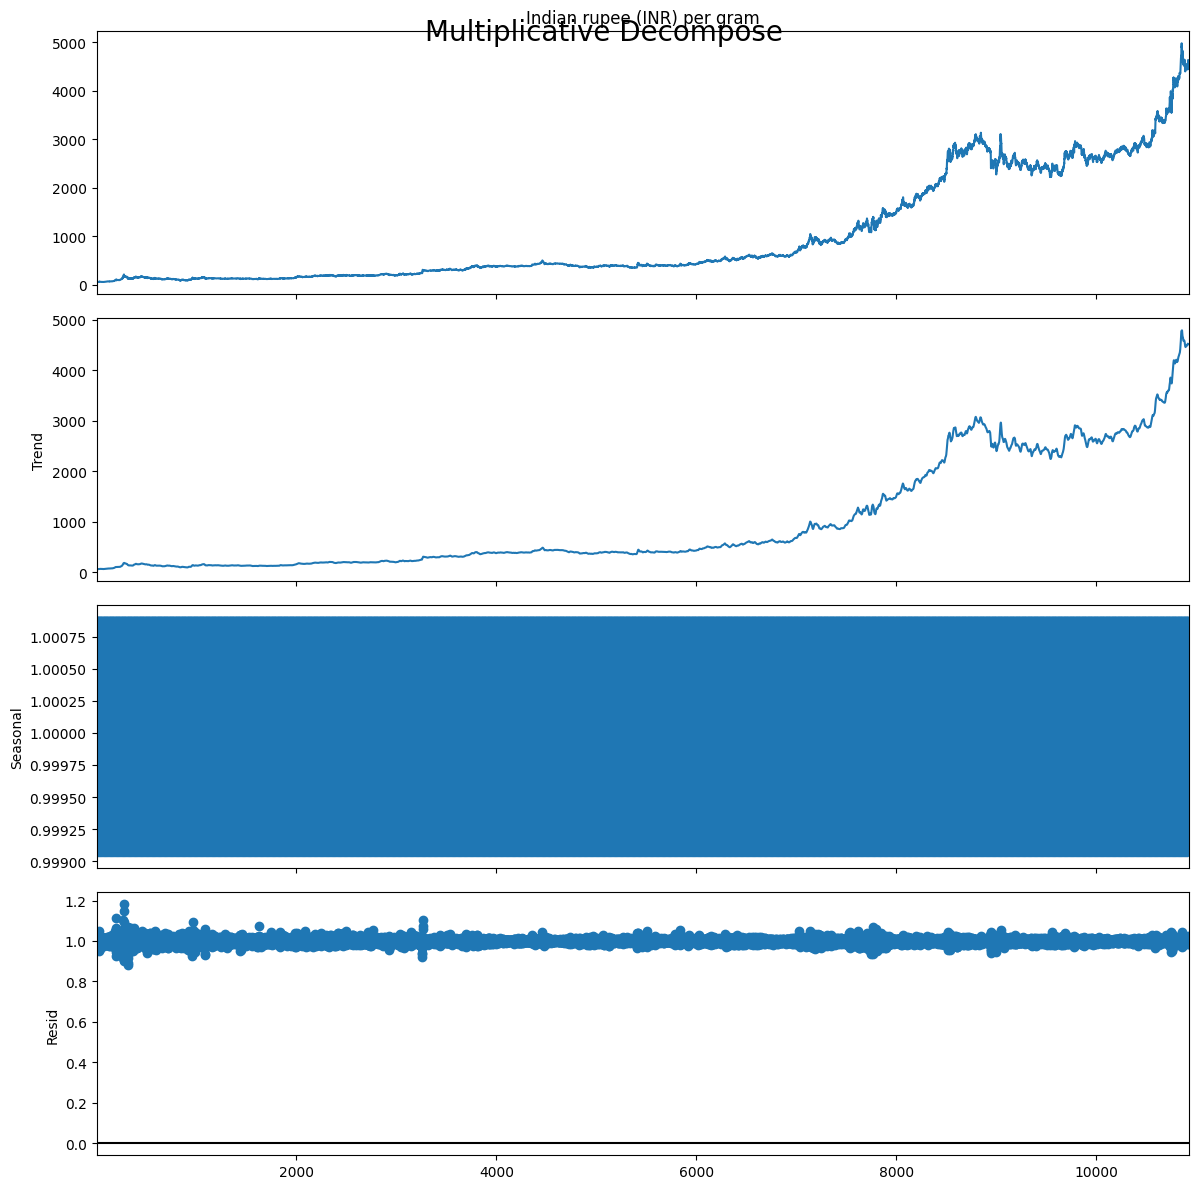

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose(df, col_name):
    """
    A function that returns the trend, seasonality, and residual captured by both multiplicative & additive model
    df --> DataFrame
    col_name --> Column Name for which decomposition is needed
    """
    # Calculate the 100-day rolling mean
    rolling_mean = df[col_name].rolling(window=365).mean()

    # Perform decomposition for both additive and multiplicative models
    res_add = seasonal_decompose(df[col_name], model='additive', period=12)  # additive decomposition
    res_mul = seasonal_decompose(df[col_name], model='multiplicative', period=12)  # multiplicative decomposition

    # Plot the rolling mean
    plt.figure(figsize=(12, 6))
    plt.plot(rolling_mean, label='Rolling Mean (365-day)', color='red')
    plt.legend()
    plt.title('100-day Rolling Mean')
    plt.show()

    # Plot decomposed components
    plt.rcParams.update({'figure.figsize': (12, 12)})
    res_add.plot().suptitle('Additive Decompose', fontsize=20)
    res_mul.plot().suptitle('Multiplicative Decompose', fontsize=20)
    plt.show()

    return res_add, res_mul

# Call the function
res_add, res_mul = decompose(train_decompose, 'Indian rupee (INR) per gram')

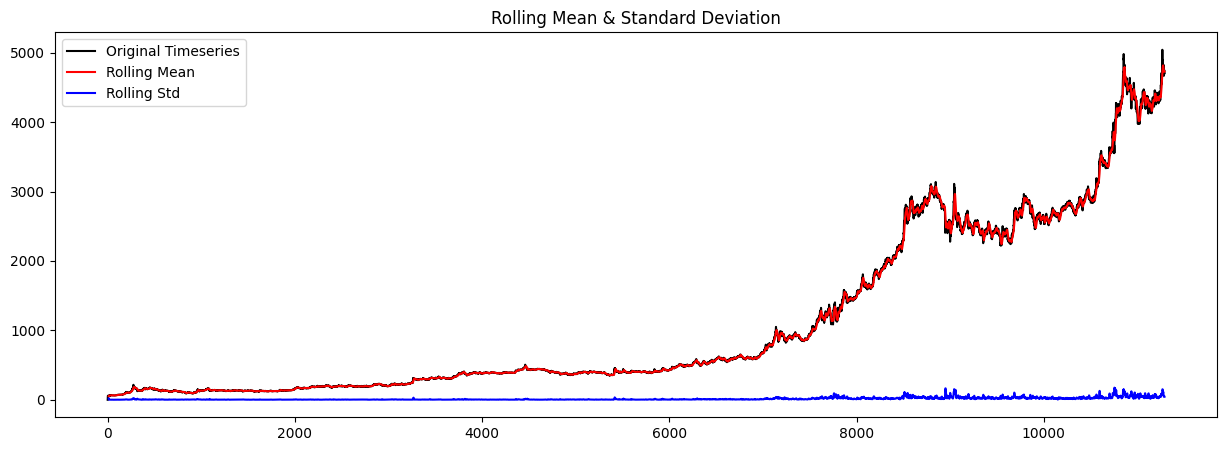

Results of Augmented Dickey-Fuller Test
Test Statistic                    2.741317
p-value                           1.000000
#lags used                       40.000000
Number of obervations used    11249.000000
Critical Value (1%)              -3.430931
dtype: float64
Test Statistic                    2.741317
p-value                           1.000000
#lags used                       40.000000
Number of obervations used    11249.000000
Critical Value (1%)              -3.430931
Critical Value (5%)              -2.861797
dtype: float64
Test Statistic                    2.741317
p-value                           1.000000
#lags used                       40.000000
Number of obervations used    11249.000000
Critical Value (1%)              -3.430931
Critical Value (5%)              -2.861797
Critical Value (10%)             -2.566907
dtype: float64


In [14]:
def test_stationarity(timeseries):
    ### Generate rolling statistics
    ma = timeseries.rolling(window=12).mean()
    mstd = timeseries.rolling(window=12).std()


    ### Plot the rolling stats
    plt.figure(figsize=(15,5))
    original = plt.plot(timeseries, color='black', label='Original Timeseries')
    mean = plt.plot(ma, color='red', label='Rolling Mean')
    std = plt.plot(mstd, color='blue', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()


    ### Peform ADF
    print('Results of Augmented Dickey-Fuller Test')
    adftest= adfuller(timeseries, autolag='AIC')
    adfoutput=pd.Series(adftest[0:4], index=['Test Statistic', 'p-value', '#lags used', 'Number of obervations used'])

    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)' %key] = value
        print(adfoutput)

train_stationarity = data ['Indian rupee (INR) per gram']
test_stationarity(train_stationarity)

<Figure size 1500x500 with 0 Axes>

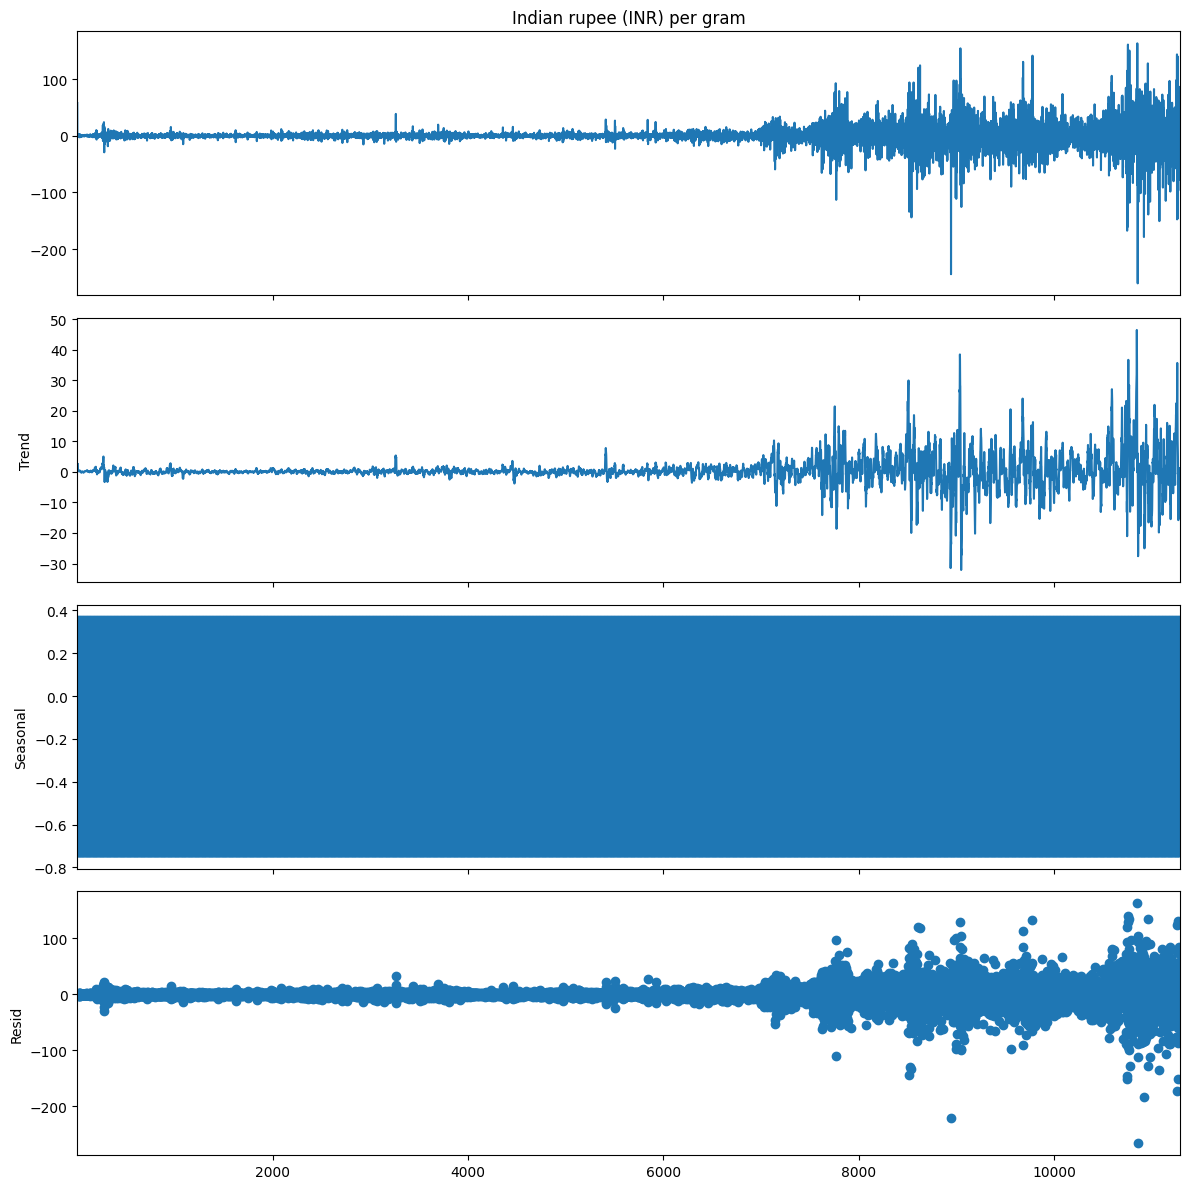

In [15]:
# Differencing
train_stationarity_diff = train_stationarity.diff(1)
train_stationarity_diff = train_stationarity_diff.dropna()
plt.figure(figsize=(15,5))
df_pass_decompose = seasonal_decompose(train_stationarity_diff, period=12).plot() #12 implies monthly
plt.show()

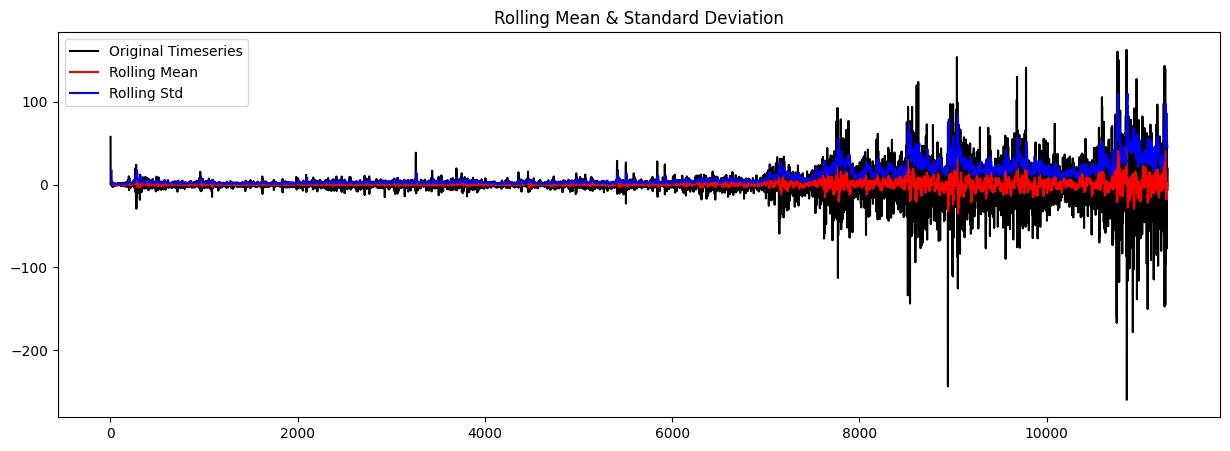

Results of Augmented Dickey-Fuller Test
Test Statistic               -1.758709e+01
p-value                       3.980845e-30
#lags used                    4.000000e+01
Number of obervations used    1.124800e+04
Critical Value (1%)          -3.430932e+00
dtype: float64
Test Statistic               -1.758709e+01
p-value                       3.980845e-30
#lags used                    4.000000e+01
Number of obervations used    1.124800e+04
Critical Value (1%)          -3.430932e+00
Critical Value (5%)          -2.861797e+00
dtype: float64
Test Statistic               -1.758709e+01
p-value                       3.980845e-30
#lags used                    4.000000e+01
Number of obervations used    1.124800e+04
Critical Value (1%)          -3.430932e+00
Critical Value (5%)          -2.861797e+00
Critical Value (10%)         -2.566907e+00
dtype: float64


In [16]:
test_stationarity(train_stationarity_diff)

In [17]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax) # ACF
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax) #PACF
        plt.tight_layout()

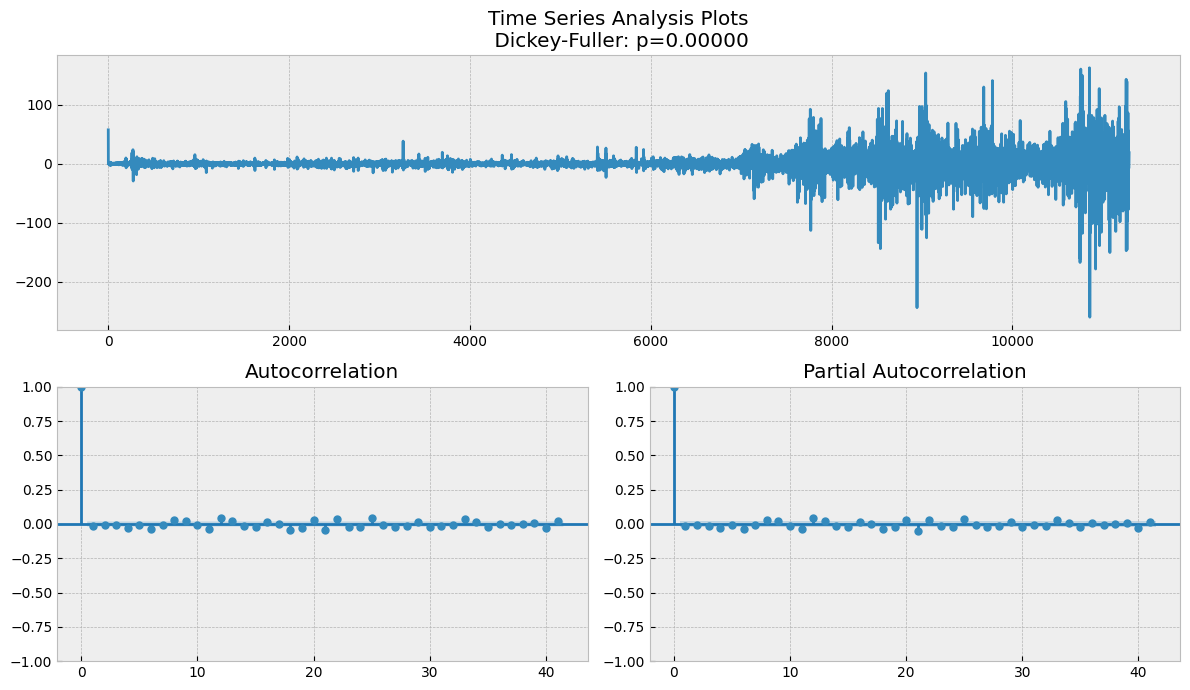

In [18]:
tsplot(train_stationarity_diff)

In [19]:
# Initial ARIMA model fitting on the complete dataset (optional, for summary)
arima_model = ARIMA(data['Indian rupee (INR) per gram'], order=(1,1,1))
model_fit = arima_model.fit()
print(model_fit.summary())

                                    SARIMAX Results                                    
Dep. Variable:     Indian rupee (INR) per gram   No. Observations:                11290
Model:                          ARIMA(1, 1, 1)   Log Likelihood              -48130.526
Date:                         Tue, 14 May 2024   AIC                          96267.053
Time:                                 11:07:07   BIC                          96289.048
Sample:                                      0   HQIC                         96274.453
                                       - 11290                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9173      0.020     46.338      0.000       0.879       0.956
ma.L1         -0.9291      0.018    -50.536      0.000     

In [20]:
print(train_ARIMA.head())

        Date  Indian rupee (INR) per gram
0 1979-01-01                     0.000000
1 1979-01-02                    57.641466
2 1979-01-03                    57.940468
3 1979-01-04                    58.248794
4 1979-01-05                    59.272152


In [21]:
# Ensure consistent numeric data types
train_ARIMA['Indian rupee (INR) per gram'] = pd.to_numeric(train_ARIMA['Indian rupee (INR) per gram'], errors='coerce')

# Drop rows with NaN values in the value column
train_ARIMA = train_ARIMA.dropna(subset=['Indian rupee (INR) per gram'])

# Convert the value column to a list for the ARIMA model
hist = train_ARIMA['Indian rupee (INR) per gram'].tolist()

# Ensure test_ARIMA is a Series or list
if isinstance(test_ARIMA, pd.DataFrame):
    test_ARIMA = test_ARIMA['Indian rupee (INR) per gram']

# Convert test_ARIMA to a list if it's not already
test_ARIMA = test_ARIMA.tolist()

# List to store predictions
predictions = []

# Rolling forecast
for t in range(len(test_ARIMA)):
    model = ARIMA(hist, order=(1, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    obs = test_ARIMA[t]  # Ensure test_ARIMA is now a list
    hist.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

<ipython-input-21-b045f63db610>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ARIMA['Indian rupee (INR) per gram'] = pd.to_numeric(train_ARIMA['Indian rupee (INR) per gram'], errors='coerce')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=4535.902914, expected=4523.569854
predicted=4523.700657, expected=4522.129500
predicted=4522.145218, expected=4474.692038
predicted=4475.186051, expected=4435.047596
predicted=4435.434826, expected=4471.928682
predicted=4471.552746, expected=4384.407276
predicted=4386.372869, expected=4281.890120
predicted=4282.724362, expected=4301.509148
predicted=4302.733037, expected=4293.402016
predicted=4293.473196, expected=4236.448576
predicted=4237.878831, expected=4196.567504
predicted=4196.882994, expected=4288.552397
predicted=4287.636675, expected=4324.968262
predicted=4325.069170, expected=4354.437636
predicted=4355.203660, expected=4372.784138
predicted=4371.951333, expected=4419.278941
predicted=4418.950475, expected=4418.040815
predicted=4418.048405, expected=4356.051282
predicted=4356.059118, expected=4367.760263
predicted=4367.744928, expected=4361.601787
predicted=4361.620787, expected=4330.832880
predicted=4330.838930, expected=4381.712401
predicted=4381.569258, expected=

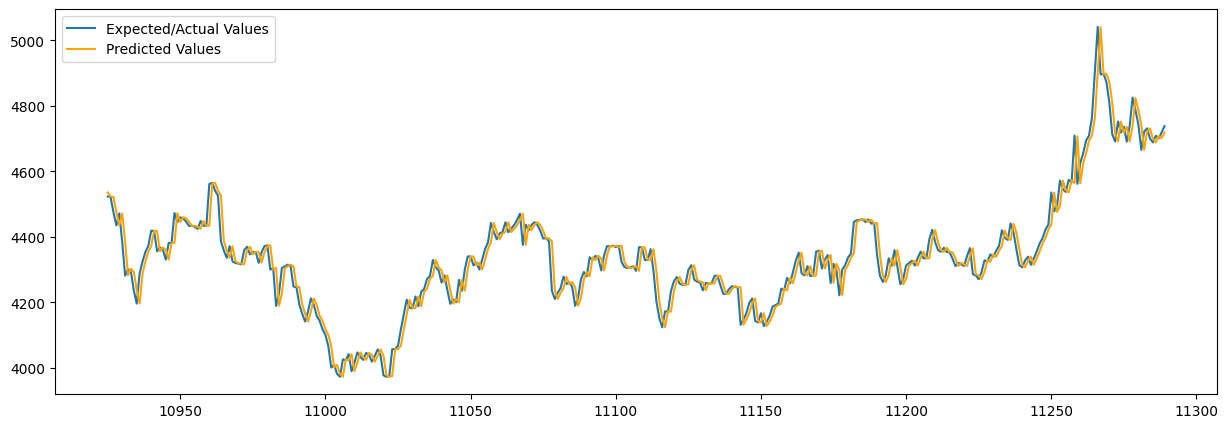

In [22]:
# Ensure test.index matches with predictions_series.index
predictions_series = pd.Series(predictions, index=test.index)

# Plot the expected/actual values and the predicted values
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Plot actual values
plt.plot(test['Indian rupee (INR) per gram'], label='Expected/Actual Values')

# Plot predicted values
plt.plot(predictions_series, label='Predicted Values', color='orange')

# Add legend
plt.legend(loc='upper left')

# Show plot
plt.show()

In [23]:
# Initial SARIMAX model fitting on the complete dataset (optional, for summary)
model_sarimax = sm.tsa.statespace.SARIMAX(train_ARIMA['Indian rupee (INR) per gram'], order=(1,1,1), seasonal_order=(1,0,1,12))
model_sarimax_fit = model_sarimax.fit()
print(model_sarimax_fit.summary())

# Convert the value column to a list for the ARIMA model
hist = train_ARIMA['Indian rupee (INR) per gram'].tolist()

# Ensure test_ARIMA is a Series or list
if isinstance(test_ARIMA, pd.DataFrame):
    test_ARIMA = test_ARIMA['Indian rupee (INR) per gram']

# List to store predictions
predictions_SARIMAX = []

# Rolling forecast
for t in range(len(test_ARIMA)):
    model = SARIMAX(hist, order=(1, 1, 1), seasonal_order=(0,1,1,12))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions_SARIMAX.append(float(yhat))
    obs = test_ARIMA[t]  # Ensure test_ARIMA is now a list
    hist.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# Ensure test.index matches with predictions_series.index
predictions_series_SARIMAX = pd.Series(predictions_SARIMAX, index=test.index)

# Plot the expected/actual values and the predicted values
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Plot actual values
plt.plot(test['Indian rupee (INR) per gram'], label='Expected/Actual Values')

# Plot predicted values
plt.plot(predictions_series_SARIMAX, label='Predicted Values', color='orange')

# Add legend
plt.legend(loc='upper left')

# Show plot
plt.show()

                                     SARIMAX Results                                      
Dep. Variable:        Indian rupee (INR) per gram   No. Observations:                10925
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood              -45595.703
Date:                            Tue, 14 May 2024   AIC                          91201.405
Time:                                    11:13:11   BIC                          91237.899
Sample:                                         0   HQIC                         91213.704
                                          - 10925                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0217      0.395     -0.055      0.956      -0.796       0.753
ma.L1          0.0124      0.395   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=4536.581899, expected=4523.569854
predicted=4524.395936, expected=4522.129500
predicted=4523.340137, expected=4474.692038
predicted=4475.539254, expected=4435.047596
predicted=4435.598454, expected=4471.928682
predicted=4471.726560, expected=4384.407276
predicted=4386.142079, expected=4281.890120
predicted=4281.262277, expected=4301.509148
predicted=4301.376900, expected=4293.402016
predicted=4293.423538, expected=4236.448576
predicted=4237.903802, expected=4196.567504
predicted=4197.268080, expected=4288.552397
predicted=4288.054253, expected=4324.968262
predicted=4326.378660, expected=4354.437636
predicted=4355.293948, expected=4372.784138
predicted=4372.891084, expected=4419.278941
predicted=4419.260339, expected=4418.040815
predicted=4418.244845, expected=4356.051282
predicted=4356.765625, expected=4367.760263
predicted=4368.375157, expected=4361.601787
predicted=4361.966034, expected=4330.832880
predicted=4330.789438, expected=4381.712401
predicted=4382.051003, expected=

KeyboardInterrupt: 